# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [204]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [205]:
df = pd.read_csv("RTA_Dataset.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [206]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [208]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [209]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}\n") # nan, Unknown, No defect=0, other, na, 
  

'Time': ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

'Day_of_week': ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

'Age_band_of_driver': ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

'Sex_of_driver': ['Male' 'Female' 'Unknown']

'Educational_level': ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

'Vehicle_driver_relation': ['Employee' 'Unknown' 'Owner' nan 'Other']

'Driving_experience': ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']

'Type_of_vehicle': ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']

'Owner_of_vehicle': ['Owner' 'Governmental' nan 'Organization' 'Other']

'Service_year_of_vehicle': ['Above 10yr' '5-1

In [210]:
import numpy as np


df.replace(['na', 'Na', 'nA', 'NA', 'nan', 'Nan', 'nAn', 'NAn', 'naN', 'NaN', 'nAN', 'NAN', 'Unknown', 'other', "unknown", "other", "Bajaj", "Other", "Unknown"], np.nan, inplace=True)

df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,NaN,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,NaN,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,NaN,Owner,2-5yrs,...,NaN,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,NaN,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [211]:
def clean_categorical_columns(df):
    for column in df.select_dtypes(include=['object', 'category']).columns:
        df[column] = df[column].str.strip().str.lower()
        print(f"Unique values after cleaning: {df[column].unique()}\n")

clean_categorical_columns(df)

df

Unique values after cleaning: ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

Unique values after cleaning: ['monday' 'sunday' 'friday' 'wednesday' 'saturday' 'thursday' 'tuesday']

Unique values after cleaning: ['18-30' '31-50' 'under 18' 'over 51' nan]

Unique values after cleaning: ['male' 'female' nan]

Unique values after cleaning: ['above high school' 'junior high school' nan 'elementary school'
 'high school' 'illiterate' 'writing & reading']

Unique values after cleaning: ['employee' nan 'owner']

Unique values after cleaning: ['1-2yr' 'above 10yr' '5-10yr' '2-5yr' nan 'no licence' 'below 1yr']

Unique values after cleaning: ['automobile' 'public (> 45 seats)' 'lorry (41?100q)' nan
 'public (13?45 seats)' 'lorry (11?40q)' 'long lorry' 'public (12 seats)'
 'taxi' 'pick up upto 10q' 'stationwagen' 'ridden horse' 'turbo'
 'motorcycle' 'special vehicle' 'bicycle']

Unique values after cleaning: ['owner' 'governmental' nan 'organization']

Unique values after c

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,going straight,NaN,NaN,NaN,NaN,NaN,NaN,not a pedestrian,moving backward,slight injury
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,going straight,NaN,NaN,NaN,NaN,NaN,NaN,not a pedestrian,overtaking,slight injury
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41?100q),owner,NaN,...,going straight,driver or rider,male,31-50,3,driver,NaN,not a pedestrian,changing lane to the left,serious injury
3,1:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,NaN,...,going straight,pedestrian,female,18-30,3,driver,normal,not a pedestrian,changing lane to the right,slight injury
4,1:06:00,sunday,18-30,male,junior high school,employee,2-5yr,NaN,owner,5-10yrs,...,going straight,NaN,NaN,NaN,NaN,NaN,NaN,not a pedestrian,overtaking,slight injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,wednesday,31-50,male,NaN,employee,2-5yr,lorry (11?40q),owner,NaN,...,going straight,NaN,NaN,NaN,NaN,driver,normal,not a pedestrian,no distancing,slight injury
12312,18:00:00,sunday,NaN,male,elementary school,employee,5-10yr,automobile,owner,NaN,...,NaN,NaN,NaN,NaN,NaN,driver,normal,not a pedestrian,no distancing,slight injury
12313,13:55:00,sunday,over 51,male,junior high school,employee,5-10yr,NaN,owner,2-5yrs,...,NaN,driver or rider,male,31-50,3,driver,normal,not a pedestrian,changing lane to the right,serious injury
12314,13:55:00,sunday,18-30,female,junior high school,employee,above 10yr,lorry (41?100q),owner,2-5yrs,...,NaN,NaN,NaN,NaN,NaN,driver,normal,not a pedestrian,driving under the influence of drugs,slight injury


In [212]:
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nOutliers for numeric columns:")
for column in numeric_columns:
    print(f"\nColumn: {column}")
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(outliers)


Outliers for numeric columns:

Column: Number_of_vehicles_involved
5        1
6        1
21       1
27       1
30       1
        ..
12301    1
12302    1
12307    1
12310    1
12313    1
Name: Number_of_vehicles_involved, Length: 3976, dtype: int64

Column: Number_of_casualties
72       4
73       4
74       4
75       4
107      4
        ..
12271    4
12296    4
12297    4
12298    4
12299    4
Name: Number_of_casualties, Length: 720, dtype: int64


In [213]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver             1548
Sex_of_driver                   178
Educational_level               841
Vehicle_driver_relation         716
Driving_experience              862
Type_of_vehicle                2187
Owner_of_vehicle                504
Service_year_of_vehicle        6811
Defect_of_vehicle              4427
Area_accident_occured          4080
Lanes_or_Medians               2102
Road_allignment                 142
Types_of_Junction              1523
Road_surface_type               339
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions              588
Type_of_collision               195
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement               1333
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

In [214]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [215]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           10768 non-null  object
 3   Sex_of_driver                12138 non-null  object
 4   Educational_level            11475 non-null  object
 5   Vehicle_driver_relation      11600 non-null  object
 6   Driving_experience           11454 non-null  object
 7   Type_of_vehicle              10129 non-null  object
 8   Owner_of_vehicle             11812 non-null  object
 9   Service_year_of_vehicle      5505 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        8236 non-null   object
 12  Lanes_or_Medians             10214 non-null  object
 13  Road_allignment              12

In [217]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver             1548
Sex_of_driver                   178
Educational_level               841
Vehicle_driver_relation         716
Driving_experience              862
Type_of_vehicle                2187
Owner_of_vehicle                504
Service_year_of_vehicle        6811
Defect_of_vehicle              4427
Area_accident_occured          4080
Lanes_or_Medians               2102
Road_allignment                 142
Types_of_Junction              1523
Road_surface_type               339
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions              588
Type_of_collision               195
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement               1333
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

In [218]:
from sklearn.impute import KNNImputer
import pandas as pd

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

knn_imputer = KNNImputer(n_neighbors=4)
df['Number_of_casualties'] = knn_imputer.fit_transform(df[numeric_columns])


In [219]:
df['Number_of_vehicles_involved'].fillna(df['Number_of_vehicles_involved'].mean(), inplace=True)

/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_54131/629734975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number_of_vehicles_involved'].fillna(df['Number_of_vehicles_involved'].mean(), inplace=True)


In [220]:
import pandas as pd


mode_columns = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 
                'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
                'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 
                'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 
                'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 
                'Fitness_of_casuality', 'Cause_of_accident', 'Service_year_of_vehicle']

median_columns = ['Defect_of_vehicle']

for col in mode_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in median_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

print(df.isna().sum())


Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_54131/3137958976.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_54131/3137958976.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [221]:
df['Service_year_of_vehicle'].unique()

array(['above 10yr', '5-10yrs', '2-5yrs', '1-2yr', 'below 1yr'],
      dtype=object)

In [222]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  object 
 1   Day_of_week                  12316 non-null  object 
 2   Age_band_of_driver           12316 non-null  object 
 3   Sex_of_driver                12316 non-null  object 
 4   Educational_level            12316 non-null  object 
 5   Vehicle_driver_relation      12316 non-null  object 
 6   Driving_experience           12316 non-null  object 
 7   Type_of_vehicle              12316 non-null  object 
 8   Owner_of_vehicle             12316 non-null  object 
 9   Service_year_of_vehicle      12316 non-null  object 
 10  Defect_of_vehicle            12316 non-null  float64
 11  Area_accident_occured        12316 non-null  object 
 12  Lanes_or_Medians             12316 non-null  object 
 13  Road_allignment 

In [223]:
df['Defect_of_vehicle'] = pd.to_numeric(df['Defect_of_vehicle'], errors='coerce').astype(int)
df['Number_of_casualties'] = pd.to_numeric(df['Number_of_casualties'], errors='coerce').astype(int)

In [224]:
df['Age_band_of_driver']

0          18-30
1          31-50
2          18-30
3          18-30
4          18-30
          ...   
12311      31-50
12312      18-30
12313    over 51
12314      18-30
12315      18-30
Name: Age_band_of_driver, Length: 12316, dtype: object

In [225]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [226]:

df_copy = df.copy()

df_copy['Defect_of_vehicle'] = df_copy['Defect_of_vehicle'].astype(int)
df_copy['Number_of_casualties'] = df_copy['Number_of_casualties'].astype(int)

df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.hour

categorical_cols = df_copy.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()



In [227]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,moving backward,slight injury
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,overtaking,slight injury
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41?100q),owner,2-5yrs,...,going straight,driver or rider,male,31-50,3,driver,normal,not a pedestrian,changing lane to the left,serious injury
3,1:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,2-5yrs,...,going straight,pedestrian,female,18-30,3,driver,normal,not a pedestrian,changing lane to the right,slight injury
4,1:06:00,sunday,18-30,male,junior high school,employee,2-5yr,automobile,owner,5-10yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,overtaking,slight injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,wednesday,31-50,male,junior high school,employee,2-5yr,lorry (11?40q),owner,2-5yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,no distancing,slight injury
12312,18:00:00,sunday,18-30,male,elementary school,employee,5-10yr,automobile,owner,2-5yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,no distancing,slight injury
12313,13:55:00,sunday,over 51,male,junior high school,employee,5-10yr,automobile,owner,2-5yrs,...,going straight,driver or rider,male,31-50,3,driver,normal,not a pedestrian,changing lane to the right,serious injury
12314,13:55:00,sunday,18-30,female,junior high school,employee,above 10yr,lorry (41?100q),owner,2-5yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,driving under the influence of drugs,slight injury


In [228]:

label_enc = LabelEncoder()
ordinal_cols = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience']
for col in ordinal_cols:
    if col in df_copy.columns:
        df_copy[col] = label_enc.fit_transform(df_copy[col])

nominal_cols = ['Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident']


In [229]:

if 'Accident_severity' in numerical_cols:
    numerical_cols.remove('Accident_severity')

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [230]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, nominal_cols)
    ])

X_processed = preprocessor.fit_transform(df_copy.drop(columns=['Accident_severity']))
df_copy


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,1,0,1,0,0,0,automobile,owner,above 10yr,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,moving backward,slight injury
1,17,1,1,1,4,0,3,public (> 45 seats),owner,5-10yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,overtaking,slight injury
2,17,1,0,1,4,0,0,lorry (41?100q),owner,2-5yrs,...,going straight,driver or rider,male,31-50,3,driver,normal,not a pedestrian,changing lane to the left,serious injury
3,1,3,0,1,4,0,2,public (> 45 seats),governmental,2-5yrs,...,going straight,pedestrian,female,18-30,3,driver,normal,not a pedestrian,changing lane to the right,slight injury
4,1,3,0,1,4,0,1,automobile,owner,5-10yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,overtaking,slight injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,6,1,1,4,0,1,lorry (11?40q),owner,2-5yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,no distancing,slight injury
12312,18,3,0,1,1,0,2,automobile,owner,2-5yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,no distancing,slight injury
12313,13,3,2,1,4,0,2,automobile,owner,2-5yrs,...,going straight,driver or rider,male,31-50,3,driver,normal,not a pedestrian,changing lane to the right,serious injury
12314,13,3,0,0,4,0,3,lorry (41?100q),owner,2-5yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,driving under the influence of drugs,slight injury


In [231]:
for column in df.columns:
    unique_values = df_copy[column].unique()
    print(f"'{column}': {unique_values}\n") # nan, Unknown, No defect=0, other, na, 
    # unknown, other, Bajaj, Other, Unknown
  

'Time': [17  1 14 22  8 15 12 18 13 20 16 21  9 10 19 11 23  7  0  5  6  4  3  2]

'Day_of_week': [1 3 0 6 2 4 5]

'Age_band_of_driver': [0 1 3 2]

'Sex_of_driver': [1 0]

'Educational_level': [0 4 1 2 3 5]

'Vehicle_driver_relation': [0 1]

'Driving_experience': [0 3 2 1 5 4]

'Type_of_vehicle': ['automobile' 'public (> 45 seats)' 'lorry (41?100q)'
 'public (13?45 seats)' 'lorry (11?40q)' 'long lorry' 'public (12 seats)'
 'taxi' 'pick up upto 10q' 'stationwagen' 'ridden horse' 'turbo'
 'motorcycle' 'special vehicle' 'bicycle']

'Owner_of_vehicle': ['owner' 'governmental' 'organization']

'Service_year_of_vehicle': ['above 10yr' '5-10yrs' '2-5yrs' '1-2yr' 'below 1yr']

'Defect_of_vehicle': [7 5]

'Area_accident_occured': ['residential areas' 'office areas' 'recreational areas'
 'industrial areas' 'church areas' 'market areas' 'rural village areas'
 'outside rural areas' 'hospital areas' 'school areas'
 'rural village areasoffice areas']

'Lanes_or_Medians': ['two-way (divided with brok

In [232]:
# scaler = StandardScaler()

# df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])

# print(df_copy[['Hour', 'Time_of_Day', 'Vehicles_Light_Interaction', 'Casualties_Weather_Interaction', 'Day_Hour_Interaction', 'Experience_VehicleDefect_Interaction']].head())

# correlation_matrix = df_copy.corr()
# print(correlation_matrix[['Vehicles_Light_Interaction', 'Casualties_Weather_Interaction', 'Day_Hour_Interaction', 'Experience_VehicleDefect_Interaction']])

In [233]:

from sklearn.model_selection import train_test_split

X_processed = preprocessor.fit_transform(df_copy.drop(columns=['Accident_severity']))

y = df_copy['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (9852, 146)
Testing set shape: (2464, 146)


In [234]:
import pandas as pd
import numpy as np

df_copy = df.copy()

numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

def detect_outliers(df, columns):
    outliers = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_col])
    return outliers.drop_duplicates()

outliers_df = detect_outliers(df_copy, numerical_cols)

outliers_df


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
41,21:50:00,sunday,31-50,male,junior high school,employee,5-10yr,automobile,owner,5-10yrs,...,going straight,driver or rider,female,31-50,3,driver,normal,not a pedestrian,changing lane to the left,slight injury
207,14:10:00,wednesday,18-30,male,junior high school,owner,2-5yr,automobile,owner,1-2yr,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,no distancing,slight injury
1058,16:00:00,tuesday,31-50,male,junior high school,employee,5-10yr,automobile,owner,5-10yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,getting off the vehicle improperly,slight injury
1224,17:30:00,thursday,18-30,male,junior high school,owner,2-5yr,automobile,owner,1-2yr,...,going straight,pedestrian,female,over 51,3,driver,normal,"in carriageway, stationot a pedestrianry - not...",no priority to pedestrian,slight injury
2071,22:45:00,wednesday,18-30,male,junior high school,employee,5-10yr,automobile,owner,5-10yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,no priority to vehicle,slight injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12301,17:25:00,friday,31-50,male,junior high school,employee,1-2yr,public (> 45 seats),owner,1-2yr,...,going straight,driver or rider,male,18-30,3,self-employed,normal,not a pedestrian,driving carelessly,serious injury
12302,17:25:00,friday,31-50,male,junior high school,employee,5-10yr,automobile,owner,1-2yr,...,going straight,driver or rider,male,18-30,3,self-employed,normal,not a pedestrian,moving backward,serious injury
12307,17:10:00,friday,31-50,male,junior high school,employee,above 10yr,pick up upto 10q,governmental,below 1yr,...,moving backward,driver or rider,male,18-30,3,driver,normal,not a pedestrian,moving backward,slight injury
12310,9:05:00,friday,18-30,male,junior high school,employee,5-10yr,special vehicle,owner,above 10yr,...,reversing,passenger,male,over 51,3,employee,normal,not a pedestrian,changing lane to the left,serious injury


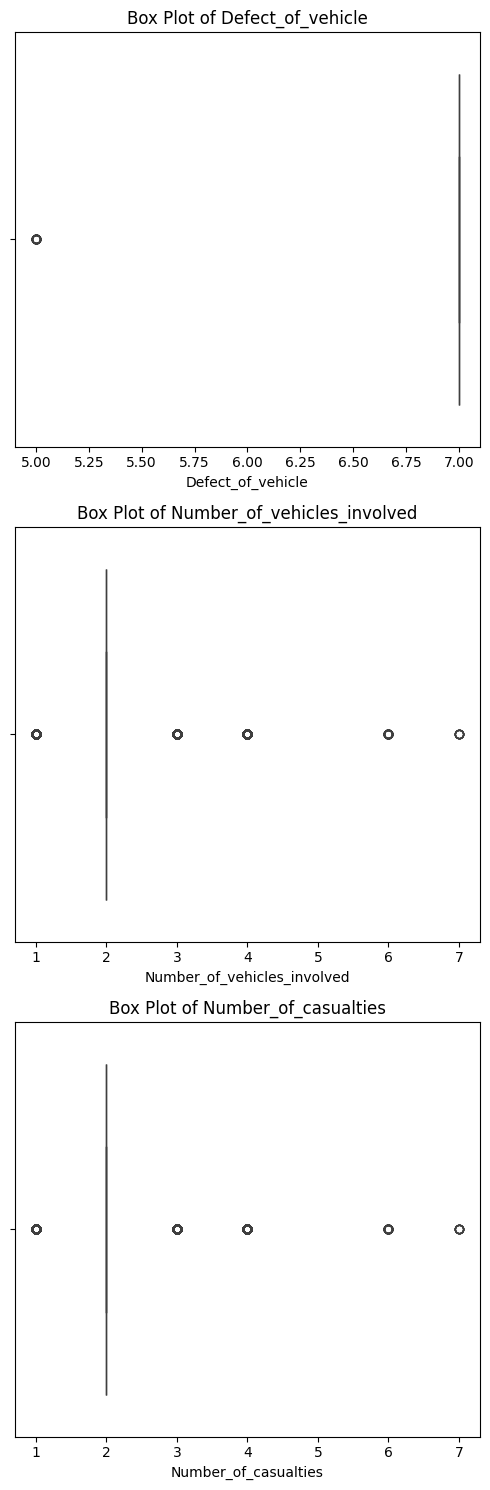

In [235]:


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(5, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


**No Significant outliers detected; no handling needed.**

# Feature Engineering

In [236]:
df_copy['Hour'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.hour

In [237]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_copy['Time_of_Day'] = df_copy['Hour'].apply(categorize_time)


In [238]:
df_copy[['Hour', 'Time_of_Day']]

,Hour,Time_of_Day
0,17,Evening
1,17,Evening
2,17,Evening
3,1,Night
4,1,Night
...,...,...
12311,16,Afternoon
12312,18,Evening
12313,13,Afternoon
12314,13,Afternoon


In [239]:
df_copy['Hour'].unique()

array([17,  1, 14, 22,  8, 15, 12, 18, 13, 20, 16, 21,  9, 10, 19, 11, 23,
        7,  0,  5,  6,  4,  3,  2], dtype=int32)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

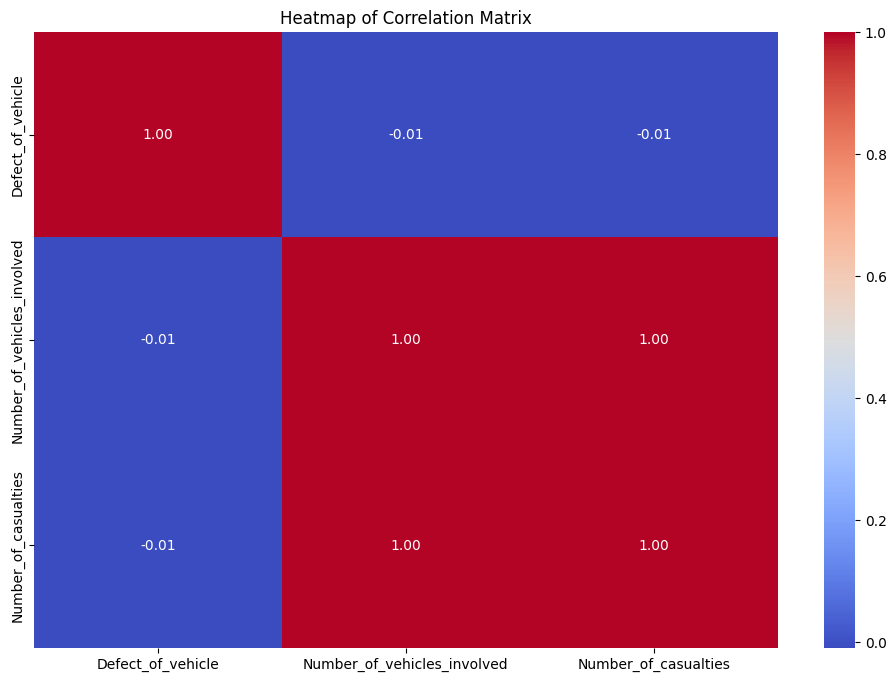

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df_copy[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


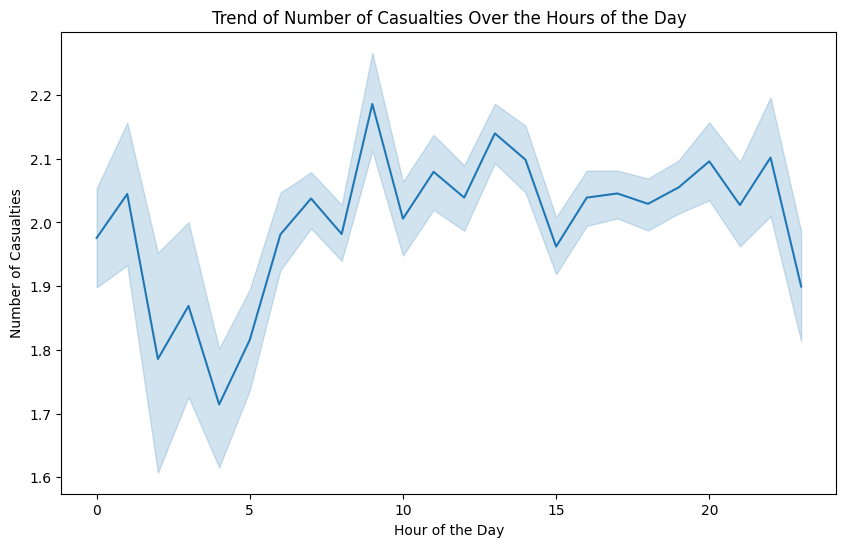

In [241]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_copy, x='Hour', y='Number_of_casualties')
plt.title('Trend of Number of Casualties Over the Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Casualties')
plt.show()


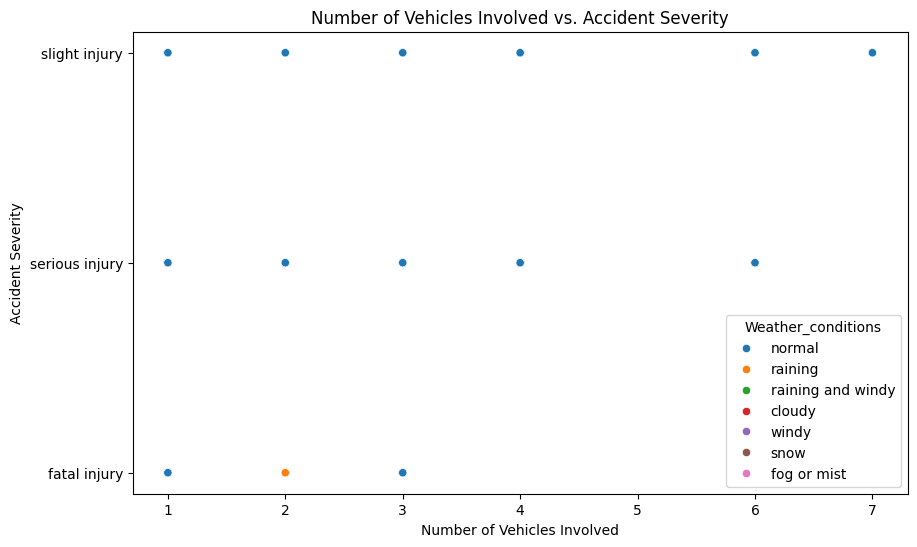

In [242]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number_of_vehicles_involved', y='Accident_severity', hue='Weather_conditions')
plt.title('Number of Vehicles Involved vs. Accident Severity')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Accident Severity')
plt.show()


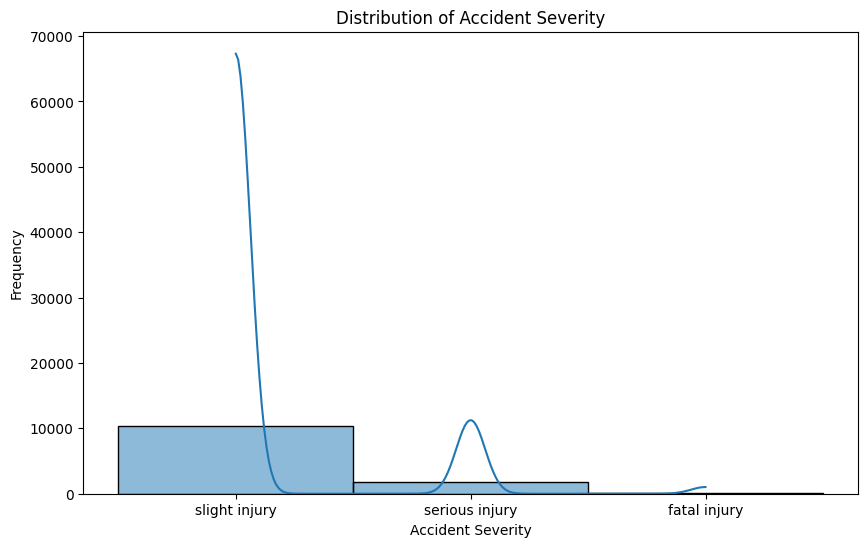

In [243]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Accident_severity', kde=True)
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.show()


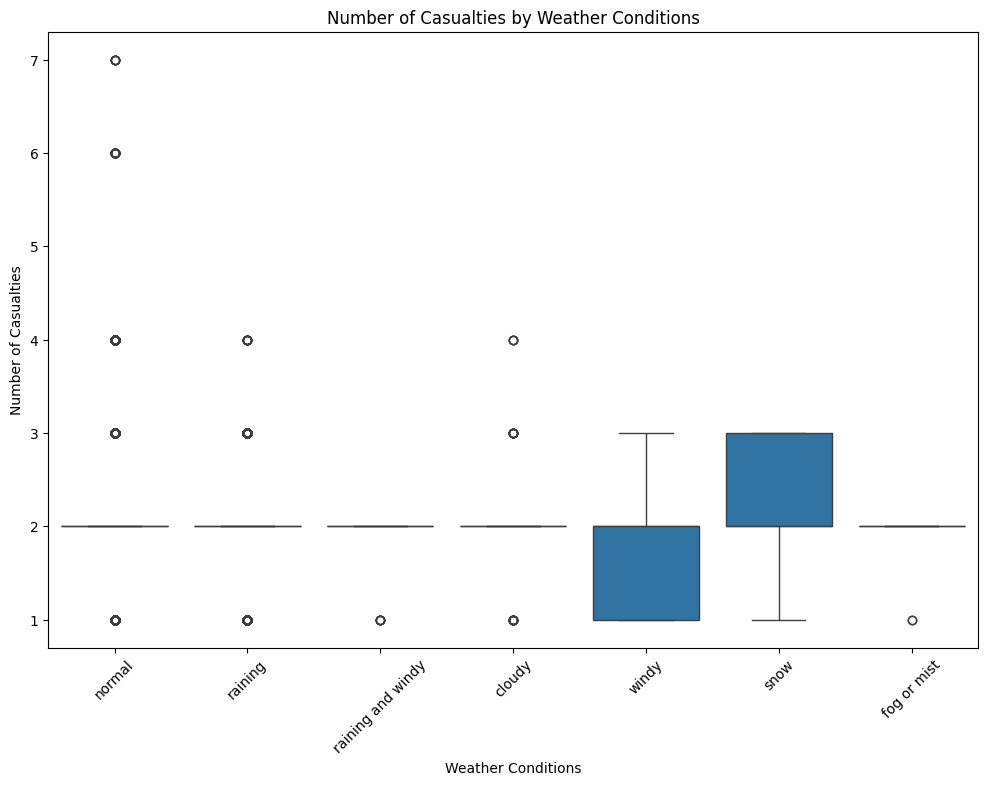

In [244]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Weather_conditions', y='Number_of_casualties')
plt.title('Number of Casualties by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()


![image.png](attachment:image.png)

In [245]:


# feature_importances = dt_model.feature_importances_
# features = X_train.columns

# importance_df = pd.DataFrame({
#     'Feature': features,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=importance_df)
# plt.title('Feature Importance')
# plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [246]:
from sklearn.model_selection import train_test_split

selected_features = [
    'Number_of_vehicles_involved', 'Weather_conditions', 'Hour', 
    'Road_surface_conditions', 'Light_conditions', 'Day_of_week'
]

df_copy['Weather_conditions'] = df_copy['Weather_conditions'].astype('category').cat.codes
df_copy['Road_surface_conditions'] = df_copy['Road_surface_conditions'].astype('category').cat.codes
df_copy['Light_conditions'] = df_copy['Light_conditions'].astype('category').cat.codes
df_copy['Day_of_week'] = df_copy['Day_of_week'].astype('category').cat.codes

X = df_copy[selected_features]
y = df_copy['Accident_severity'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')




X_train shape: (9852, 6)
X_test shape: (2464, 6)
y_train shape: (9852,)
y_test shape: (2464,)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression Cross-validated accuracy: {log_reg_cv_scores.mean()}')

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='weighted')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')


Logistic Regression Cross-validated accuracy: 0.8476451696811893


/Users/rakanalrasheed/my-jupyter-venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Decision Tree Classifier

In [248]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Decision Tree Cross-validated accuracy: {dt_cv_scores.mean()}')

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr')



Decision Tree Cross-validated accuracy: 0.8409454346913495


#### Support Vector Machine (SVM)

In [249]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)

svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'SVM Cross-validated accuracy: {svm_cv_scores.mean()}')

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')
svm_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test), multi_class='ovr')



SVM Cross-validated accuracy: 0.8476451696811893


/Users/rakanalrasheed/my-jupyter-venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### K-Neighbors Classifier

In [250]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'KNN Cross-validated accuracy: {knn_cv_scores.mean()}')

knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')
knn_roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test), multi_class='ovr')



KNN Cross-validated accuracy: 0.8311002943698862


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [251]:
print(f'LOGISTIC REGRESSION:')
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
print(f'Logistic Regression Precision: {log_reg_precision}')
print(f'Logistic Regression Recall: {log_reg_recall}')
print(f'Logistic Regression F1 Score: {log_reg_f1}')
print(f'Logistic Regression ROC AUC Score: {log_reg_roc_auc}')
print(f'\nDECISION TREE:')
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree Precision: {dt_precision}')
print(f'Decision Tree Recall: {dt_recall}')
print(f'Decision Tree F1 Score: {dt_f1}')
print(f'Decision Tree ROC AUC Score: {dt_roc_auc}')
print(f'\nSVM:')
print(f'SVM Accuracy: {svm_accuracy}')
print(f'SVM Precision: {svm_precision}')
print(f'SVM Recall: {svm_recall}')
print(f'SVM F1 Score: {svm_f1}')
print(f'SVM ROC AUC Score: {svm_roc_auc}')
print(f'\nDECISION TREE:')
print(f'KNN Accuracy: {knn_accuracy}')
print(f'KNN Precision: {knn_precision}')
print(f'KNN Recall: {knn_recall}')
print(f'KNN F1 Score: {knn_f1}')
print(f'KNN ROC AUC Score: {knn_roc_auc}')


LOGISTIC REGRESSION:
Logistic Regression Accuracy: 0.8376623376623377
Logistic Regression Precision: 0.7016781919379322
Logistic Regression Recall: 0.8376623376623377
Logistic Regression F1 Score: 0.7636638979395164
Logistic Regression ROC AUC Score: 0.5835097385635944

DECISION TREE:
Decision Tree Accuracy: 0.8380681818181818
Decision Tree Precision: 0.8032385117426548
Decision Tree Recall: 0.8380681818181818
Decision Tree F1 Score: 0.8094481511575093
Decision Tree ROC AUC Score: 0.7599413458702733

SVM:
SVM Accuracy: 0.8376623376623377
SVM Precision: 0.7016781919379322
SVM Recall: 0.8376623376623377
SVM F1 Score: 0.7636638979395164
SVM ROC AUC Score: 0.5776402705778381

DECISION TREE:
KNN Accuracy: 0.8258928571428571
KNN Precision: 0.7812782351667344
KNN Recall: 0.8258928571428571
KNN F1 Score: 0.7936018762597461
KNN ROC AUC Score: 0.6633113286625825


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Evaluate Trade-offs
- **Logistic Regression:**
- Pros: Easy to set up, you can understand the output easily, runs fast.
- Cons: Not as precise as the others, doesn't handle complex data well.
    - **Decision Trees:**

- Pros: Best accuracy and precision, easy to understand how it makes decisions, handles complex data.
- Cons: Can overfit easily, sensitive to small changes in the data.
    - **Support Vector Machine (SVM):**
- Pros: Good for high-dimensional data, doesn't overfit as much.
- Cons: Takes a long time to run, harder to understand, lower ROC AUC score.
    - **K-Neighbors Classifier (KNN):**
- Pros: Simple, non-linear relationships are no problem.
- Cons: Slow on big datasets, sensitive to irrelevant features.
    - **Justify Your Choice**

Decision Tree is the winner here. It has the highest accuracy and precision, and it handles complex data well. Plus, it's pretty easy to understand.

Feature Importance

For the Decision Tree, we can see which features are most important from the visual we did above. 
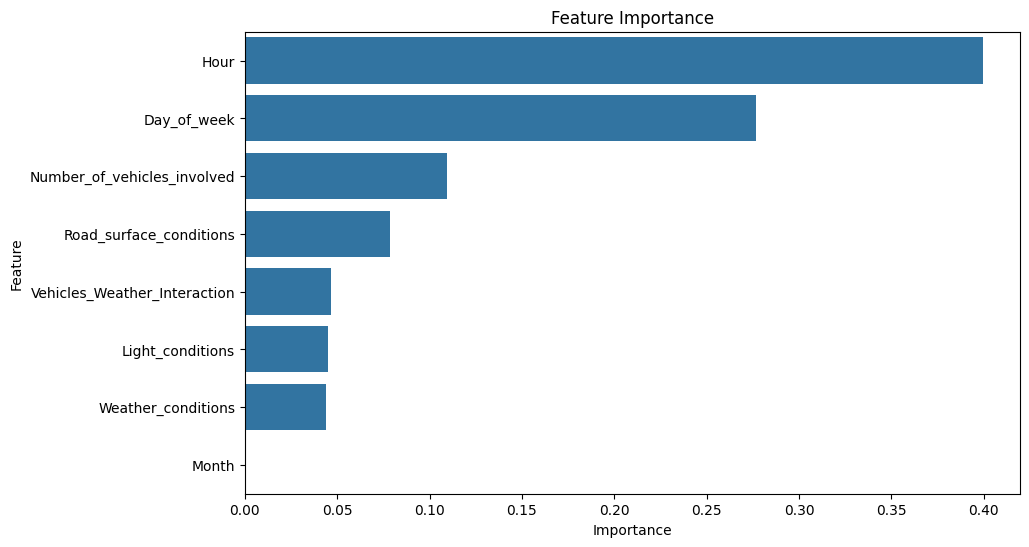

Model Limitations

Decision Tree: Overfits easily, sensitive to data changes.
Logistic Regression: Doesn't handle complex, non-linear relationships well.
SVM: Slow, hard to interpret.
KNN: Slow on large datasets, affected by irrelevant features.
Future Improvements

Hyperparameter Tuning: Adjust parameters to improve the models.
Ensemble Methods: Combine models for better performance.
Feature Engineering: Keep improving features.
Cross-validation: Use methods like Stratified K-Fold for better validation.

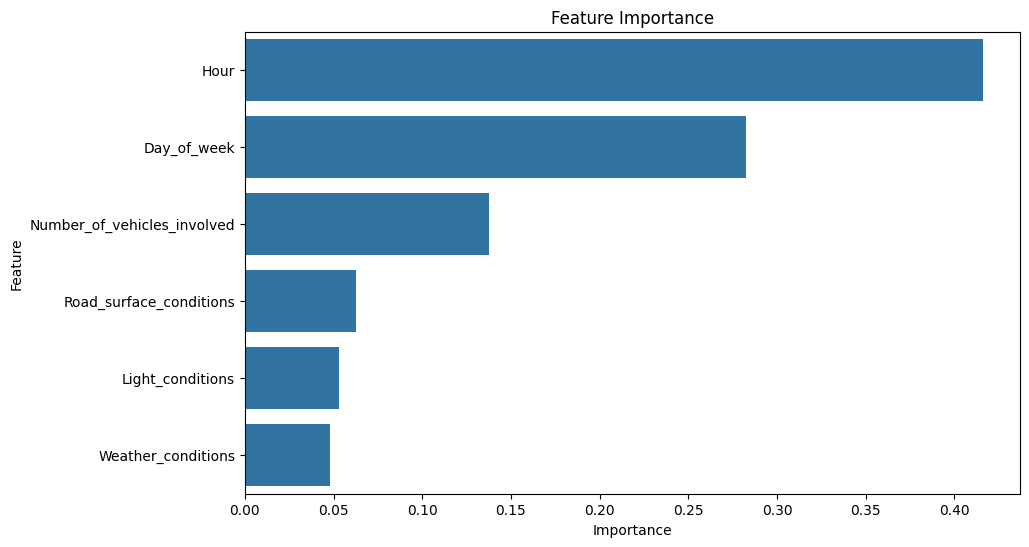

In [252]:


feature_importances = dt_model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
